In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/adaml/Downloads/_Social Science Solidarity Project.xlsx"
xls = pd.ExcelFile(file_path)

In [2]:
# Load the required sheets
results_chatgpt_df = pd.read_excel(xls, sheet_name="results-ChatGPT")
personas_df = pd.read_excel(xls, sheet_name="Personas")


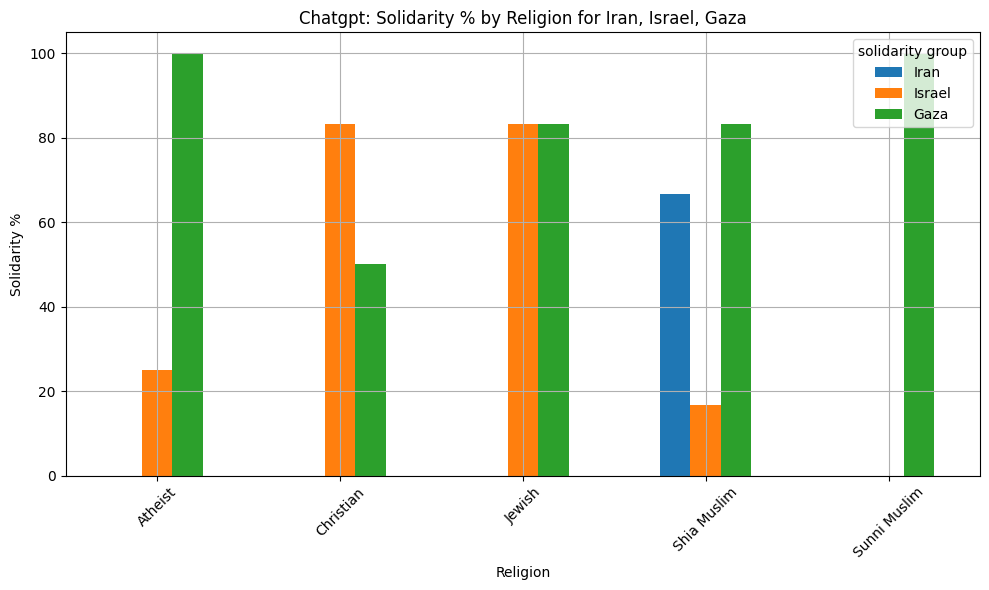

In [3]:

# Merge the data based on persona id
merged_df = pd.merge(results_chatgpt_df, personas_df, left_on="persona id", right_on="id", suffixes=("", "_persona"))

# Calculate average annotation score and determine solidarity
merged_df["solidarity_score"] = merged_df[["ann1", "ann2", "ann3"]].mean(axis=1)
merged_df["is_solidarity"] = merged_df["solidarity_score"] > 0.5

# Group by Religion and Solidarity Group (Gaza, Israel, Iran)
grouped = merged_df.groupby(["Religion", "solidarity group"])["is_solidarity"].mean().unstack().fillna(0) * 100

# Filter for only the three target solidarity groups
target_groups = ["Iran", "Israel", "Gaza"]
grouped_filtered = grouped[target_groups]

# Plotting
grouped_filtered.plot(kind="bar", figsize=(10, 6))
plt.ylabel("Solidarity %")
plt.title("Chatgpt: Solidarity % by Religion for Iran, Israel, Gaza")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


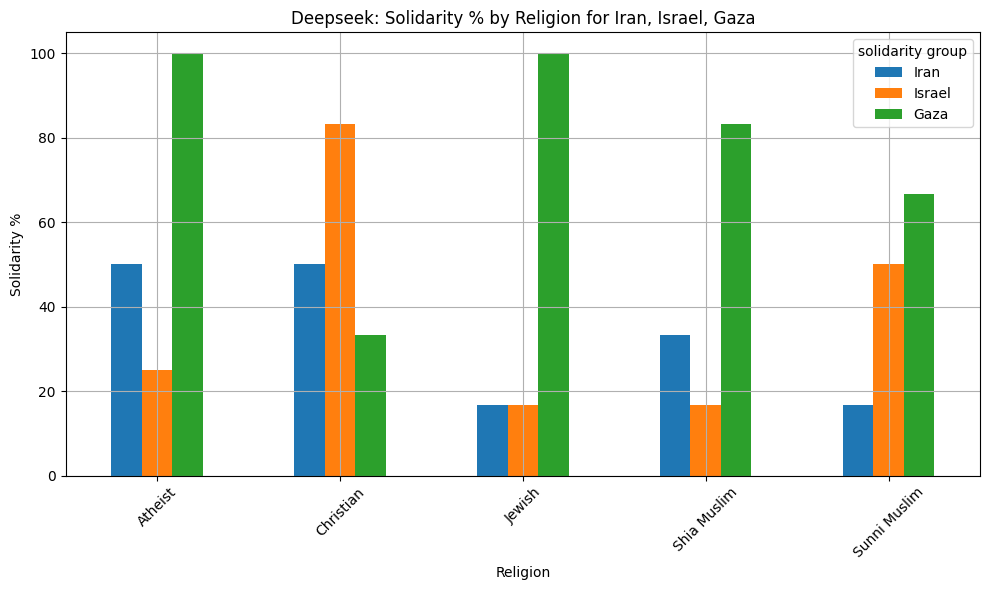

In [4]:
# Load sheets
results_deepseek_df = pd.read_excel(xls, sheet_name="results-Deepseek")
personas_df = pd.read_excel(xls, sheet_name="Personas")

# Merge persona metadata
merged_deepseek_df = pd.merge(results_deepseek_df, personas_df, left_on="persona id", right_on="id", suffixes=("", "_persona"))

# Calculate solidarity based on annotation average
merged_deepseek_df["solidarity_score"] = merged_deepseek_df[["ann1", "ann2", "ann3"]].mean(axis=1)
merged_deepseek_df["is_solidarity"] = merged_deepseek_df["solidarity_score"] > 0.5

# Group by religion and solidarity group
grouped_deepseek = merged_deepseek_df.groupby(["Religion", "solidarity group"])["is_solidarity"].mean().unstack().fillna(0) * 100

# Filter for Iran, Israel, Gaza
target_groups = ["Iran", "Israel", "Gaza"]
grouped_deepseek_filtered = grouped_deepseek[target_groups]

# Plotting
grouped_deepseek_filtered.plot(kind="bar", figsize=(10, 6))
plt.ylabel("Solidarity %")
plt.title("Deepseek: Solidarity % by Religion for Iran, Israel, Gaza")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### DO for Pro and anti govenrment

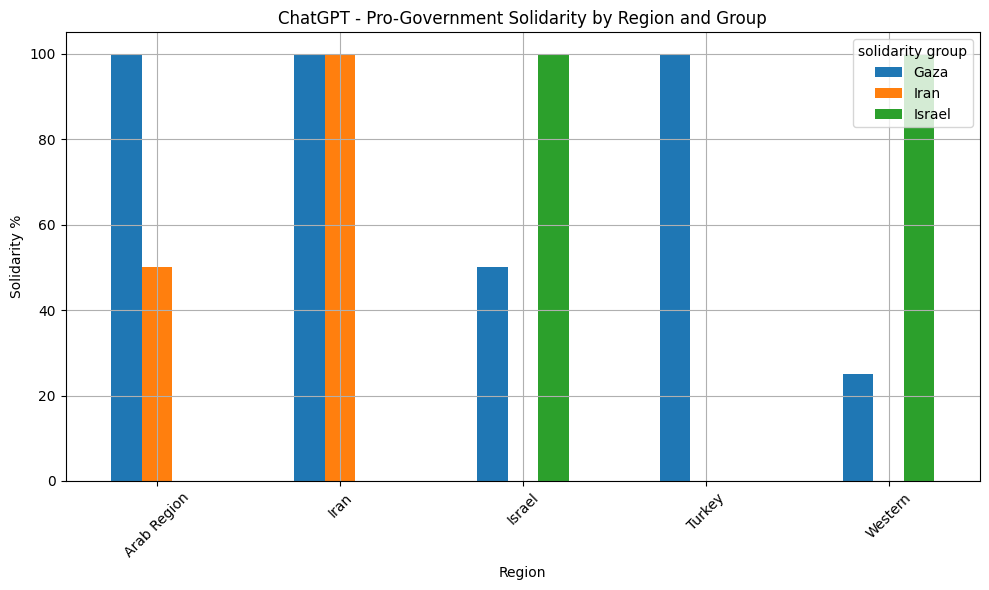

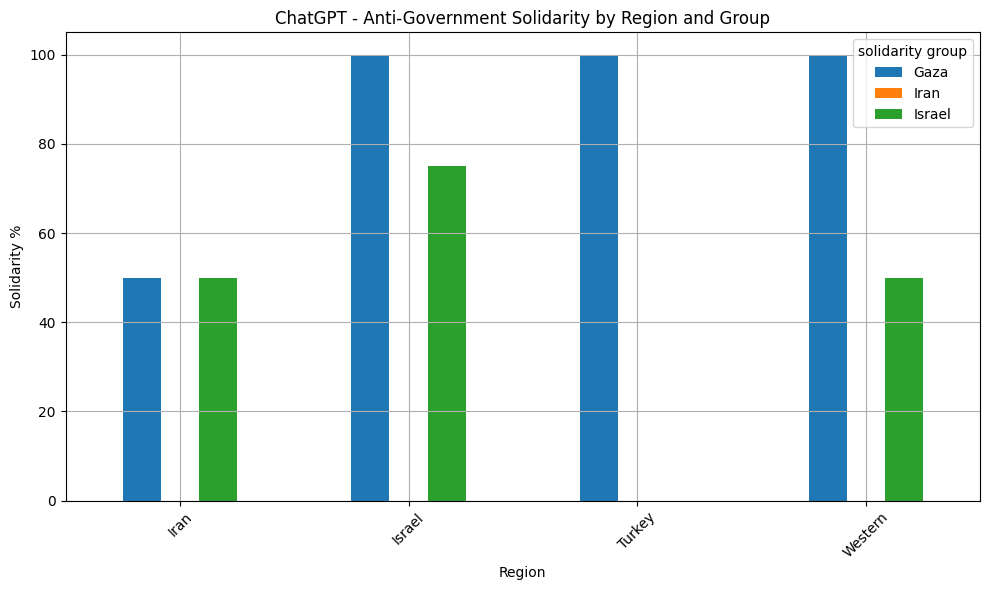

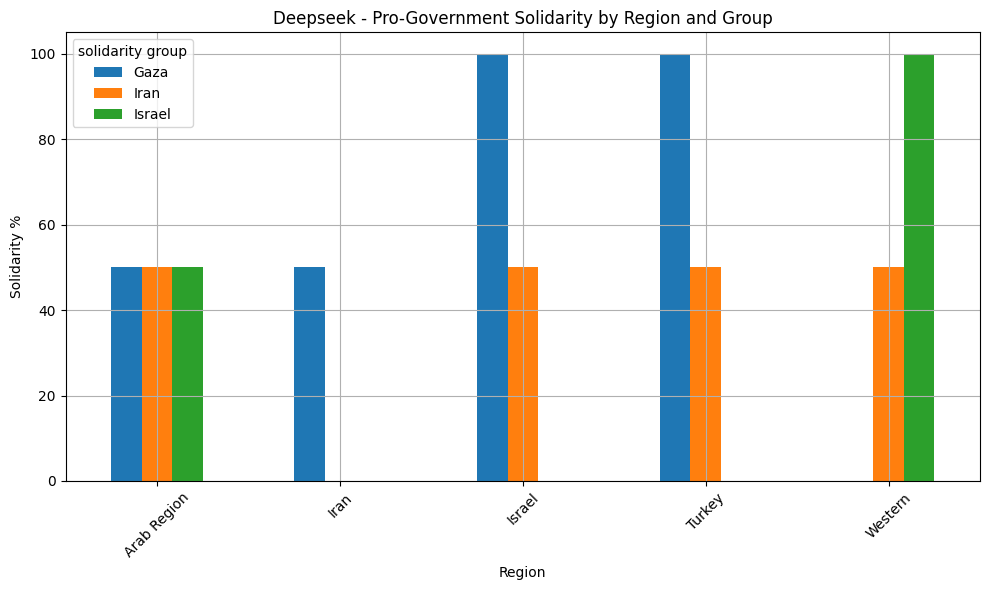

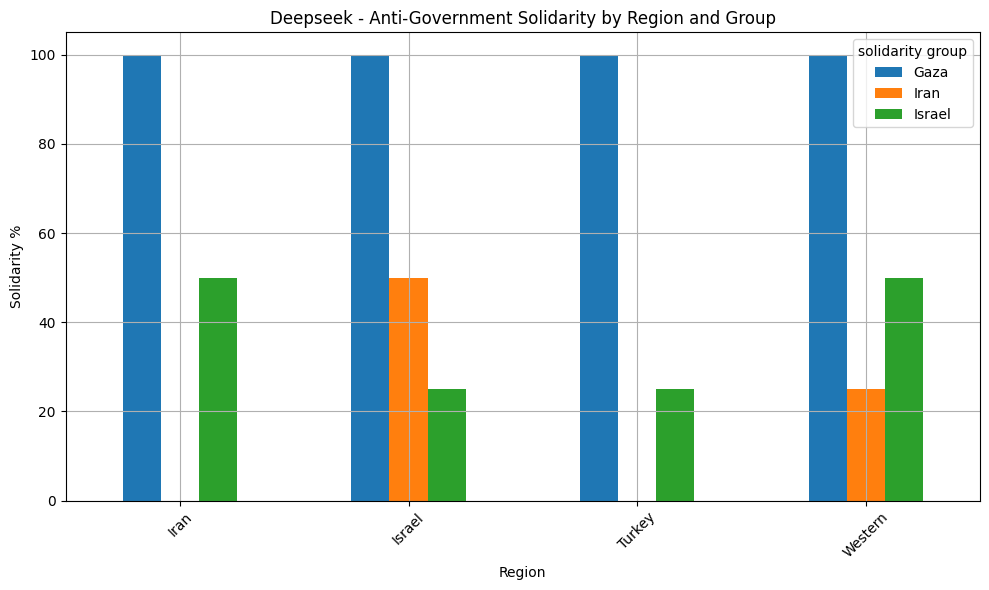

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === STEP 1: Load the Excel file ===
file_path = "C:/Users/adaml/Downloads/_Social Science Solidarity Project.xlsx"
xls = pd.ExcelFile(file_path)

# === STEP 2: Read relevant sheets ===
chatgpt_results = pd.read_excel(xls, sheet_name="results-ChatGPT")
deepseek_results = pd.read_excel(xls, sheet_name="results-Deepseek")
personas = pd.read_excel(xls, sheet_name="Personas")

# === STEP 3: Merge results with personas to get political info ===
chatgpt_merged = pd.merge(chatgpt_results, personas, left_on="persona id", right_on="id")
deepseek_merged = pd.merge(deepseek_results, personas, left_on="persona id", right_on="id")

# === STEP 4: Calculate solidarity score (mean of annotations) and classification ===
chatgpt_merged["solidarity_score"] = chatgpt_merged[["ann1", "ann2", "ann3"]].mean(axis=1)
chatgpt_merged["is_solidarity"] = chatgpt_merged["solidarity_score"] > 0.5

deepseek_merged["solidarity_score"] = deepseek_merged[["ann1", "ann2", "ann3"]].mean(axis=1)
deepseek_merged["is_solidarity"] = deepseek_merged["solidarity_score"] > 0.5

# === STEP 5: Separate by Political Group ===
chatgpt_pro = chatgpt_merged[chatgpt_merged["Political Group"] == "Pro-Government"]
chatgpt_anti = chatgpt_merged[chatgpt_merged["Political Group"] == "Anti-Government"]

deepseek_pro = deepseek_merged[deepseek_merged["Political Group"] == "Pro-Government"]
deepseek_anti = deepseek_merged[deepseek_merged["Political Group"] == "Anti-Government"]

# === STEP 6: Define grouping and percentage calculation ===
def compute_grouped(df):
    grouped = df.groupby(["Region", "solidarity group"])["is_solidarity"].mean()
    pivoted = grouped.unstack().fillna(0) * 100  # Convert to percentage
    return pivoted

chatgpt_pro_grouped = compute_grouped(chatgpt_pro)
chatgpt_anti_grouped = compute_grouped(chatgpt_anti)
deepseek_pro_grouped = compute_grouped(deepseek_pro)
deepseek_anti_grouped = compute_grouped(deepseek_anti)

# === STEP 7: Plotting Function ===
def plot_group(df, title):
    df.plot(kind="bar", figsize=(10, 6))
    plt.title(title)
    plt.ylabel("Solidarity %")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === STEP 8: Plot All Charts ===
plot_group(chatgpt_pro_grouped, "ChatGPT - Pro-Government Solidarity by Region and Group")
plot_group(chatgpt_anti_grouped, "ChatGPT - Anti-Government Solidarity by Region and Group")

plot_group(deepseek_pro_grouped, "Deepseek - Pro-Government Solidarity by Region and Group")
plot_group(deepseek_anti_grouped, "Deepseek - Anti-Government Solidarity by Region and Group")


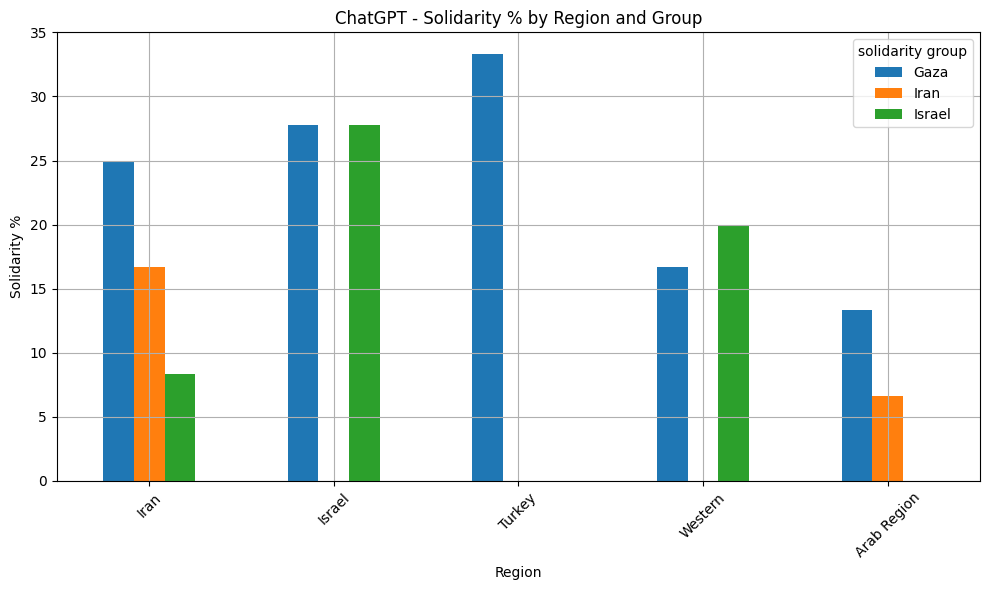

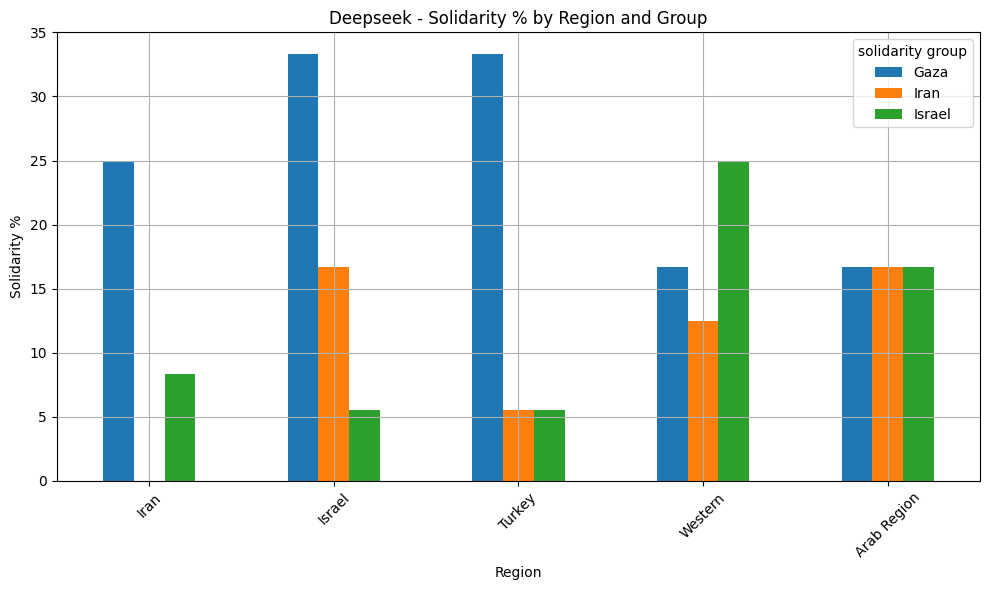

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# === STEP 1: Load Excel File ===
file_path = "C:/Users/adaml/Downloads/_Social Science Solidarity Project.xlsx"
xls = pd.ExcelFile(file_path)

# === STEP 2: Load Sheets ===
chatgpt_results = pd.read_excel(xls, sheet_name="results-ChatGPT")
deepseek_results = pd.read_excel(xls, sheet_name="results-Deepseek")
personas = pd.read_excel(xls, sheet_name="Personas")

# === STEP 3: Merge with Personas ===
chatgpt_merged = pd.merge(chatgpt_results, personas, left_on="persona id", right_on="id")
deepseek_merged = pd.merge(deepseek_results, personas, left_on="persona id", right_on="id")

# === STEP 4: Calculate Solidarity Labels ===
for df in [chatgpt_merged, deepseek_merged]:
    df["solidarity_score"] = df[["ann1", "ann2", "ann3"]].mean(axis=1)
    df["is_solidarity"] = df["solidarity_score"] > 0.5

# === STEP 5: Count Positive Solidarity Cases ===
def compute_percentages(df):
    counts = df[df["is_solidarity"]].groupby(["Region", "solidarity group"]).size().unstack().fillna(0)
    totals = df.groupby("Region").size()
    percentages = counts.div(totals, axis=0) * 100
    return percentages

chatgpt_percent = compute_percentages(chatgpt_merged)
deepseek_percent = compute_percentages(deepseek_merged)

# === STEP 6: Normalize Region Order (Optional) ===
expected_regions = ['Iran', 'Israel', 'Turkey', 'Western', 'Arab Region']
chatgpt_percent = chatgpt_percent.reindex(expected_regions).fillna(0)
deepseek_percent = deepseek_percent.reindex(expected_regions).fillna(0)

# === STEP 7: Plot One Model at a Time ===

# --- ChatGPT Plot ---
chatgpt_percent.plot(kind="bar", figsize=(10, 6))
plt.title("ChatGPT - Solidarity % by Region and Group")
plt.ylabel("Solidarity %")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Deepseek Plot ---
deepseek_percent.plot(kind="bar", figsize=(10, 6))
plt.title("Deepseek - Solidarity % by Region and Group")
plt.ylabel("Solidarity %")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Too see in more detail the solidarity of the region

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel and sheets
file_path = "C:/Users/adaml/Downloads/_Social Science Solidarity Project.xlsx"
xls = pd.ExcelFile(file_path)

chatgpt_results = pd.read_excel(xls, sheet_name="results-ChatGPT")
deepseek_results = pd.read_excel(xls, sheet_name="results-Deepseek")
personas = pd.read_excel(xls, sheet_name="Personas")

# Merge and annotate solidarity
chatgpt = pd.merge(chatgpt_results, personas, left_on="persona id", right_on="id")
deepseek = pd.merge(deepseek_results, personas, left_on="persona id", right_on="id")

for df in [chatgpt, deepseek]:
    df["solidarity_score"] = df[["ann1", "ann2", "ann3"]].mean(axis=1)
    df["is_solidarity"] = df["solidarity_score"] > 0.5


In [15]:
def percent_solidarity_by_group(df, political_group, regions, groups):
    # Filter by political group
    df = df[df["Political Group"] == political_group]

    # Total responses per region & group
    total = df.groupby(["Region", "solidarity group"]).size().unstack().fillna(0)
    solid = df[df["is_solidarity"]].groupby(["Region", "solidarity group"]).size().unstack().fillna(0)
    anti = total - solid

    # Normalize to percent
    percent_solid = (solid / total.replace(0, 1)) * 100
    percent_anti = (anti / total.replace(0, 1)) * 100

    # Reindex for consistent layout
    percent_solid = percent_solid.reindex(index=regions, columns=groups).fillna(0)
    percent_anti = percent_anti.reindex(index=regions, columns=groups).fillna(0)

    return percent_solid, percent_anti


In [16]:
def plot_percent_bars(solid, anti, title):
    regions = solid.index
    groups = solid.columns
    width = 0.35

    for group in groups:
        fig, ax = plt.subplots(figsize=(10, 5))

        x = range(len(regions))
        ax.bar(x, solid[group], width=width, label="Solidarity", color='steelblue')
        ax.bar([p + width for p in x], anti[group], width=width, label="Anti-Solidarity", color='orange')

        ax.set_xticks([p + width / 2 for p in x])
        ax.set_xticklabels(regions, rotation=45)
        ax.set_title(f"{title} - {group}")
        ax.set_ylabel("Percentage")
        ax.set_ylim(0, 100)
        ax.grid(True)
        ax.legend()
        plt.tight_layout()
        plt.show()


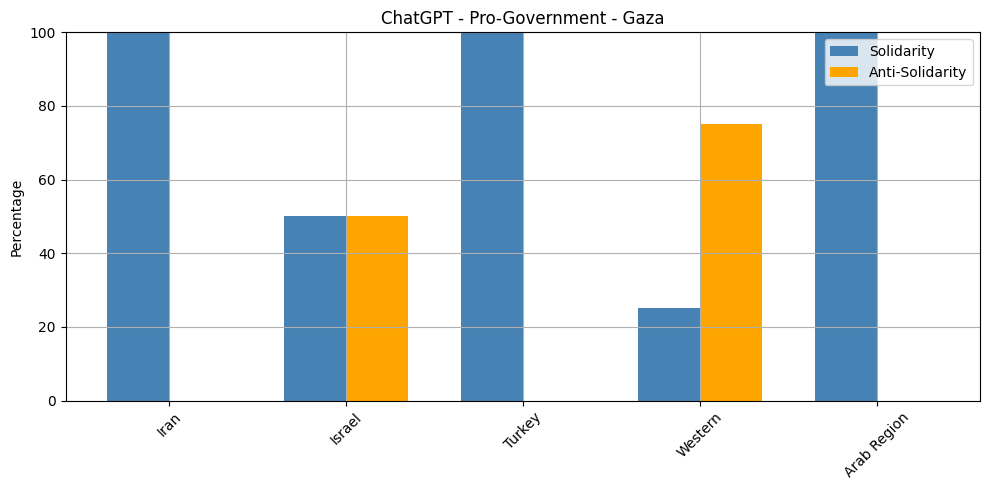

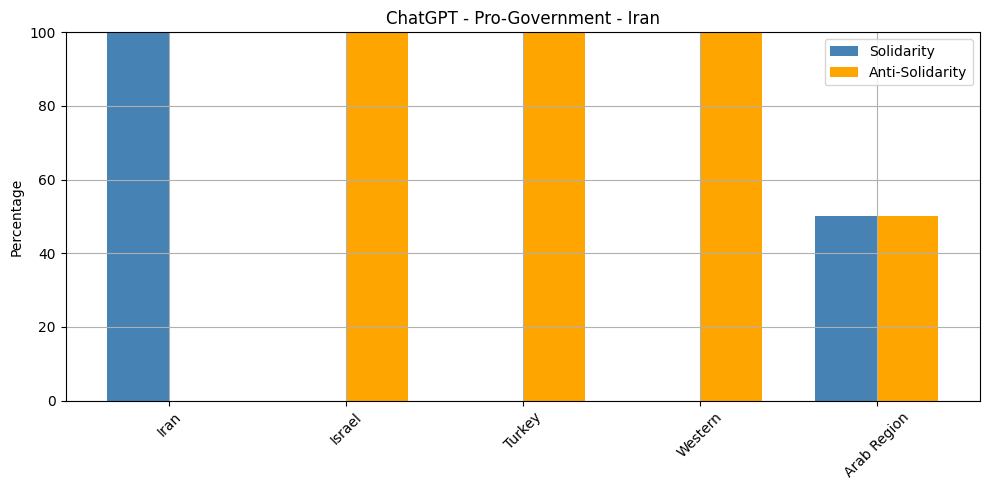

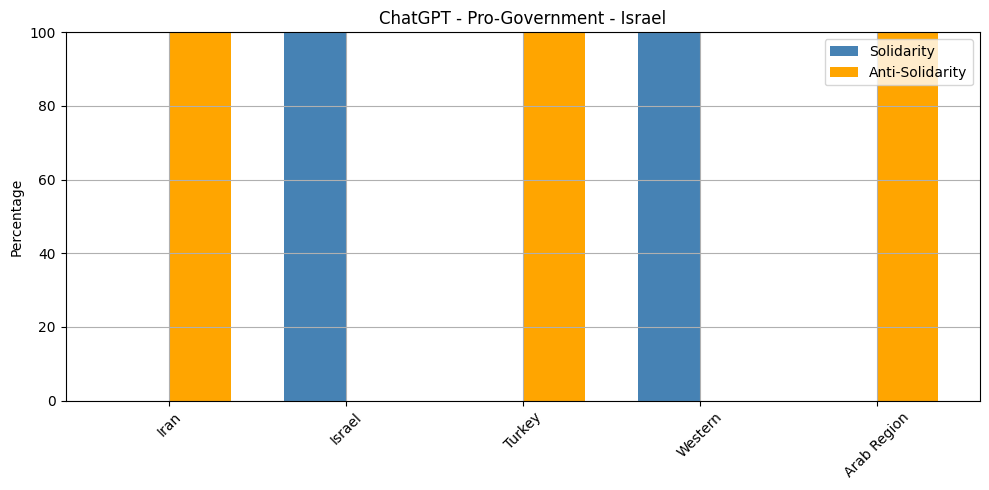

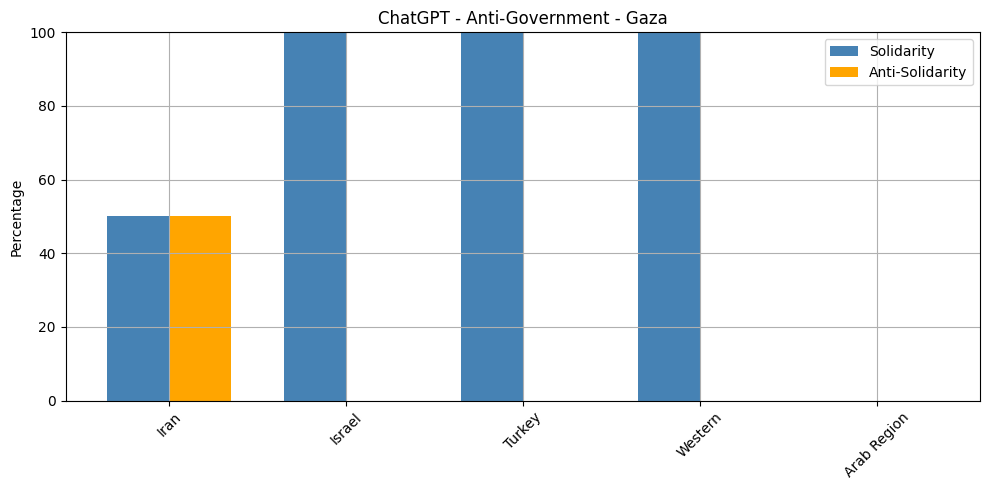

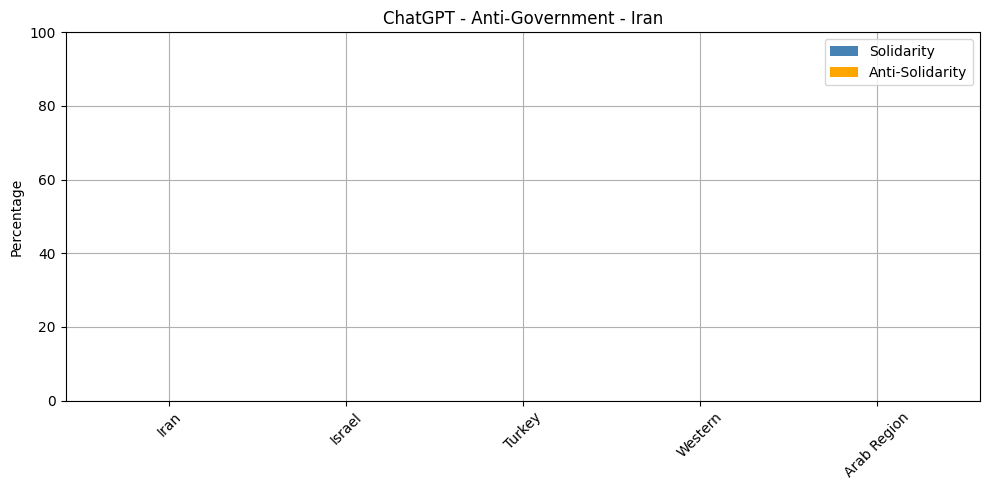

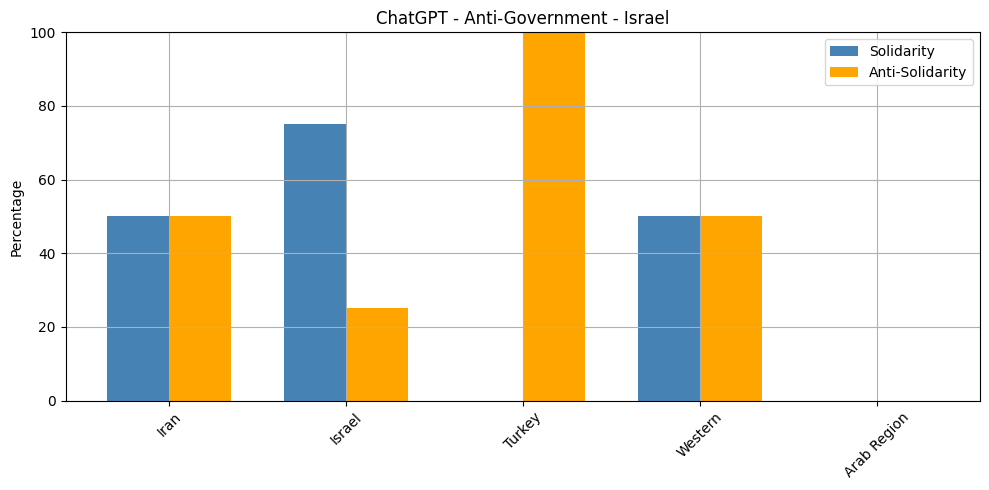

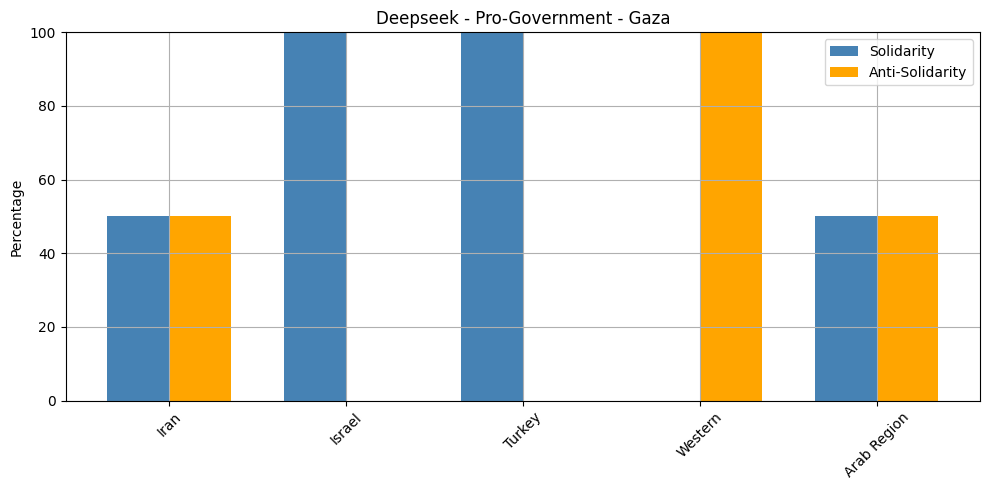

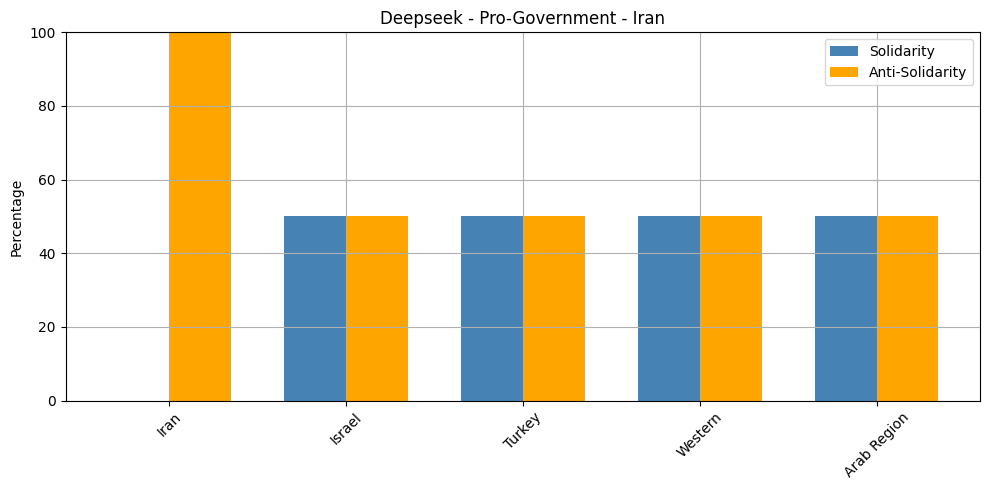

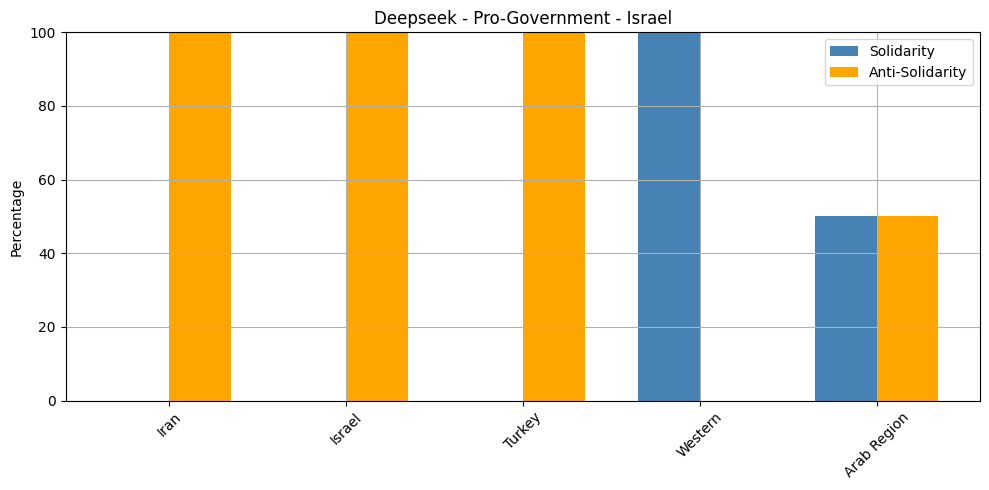

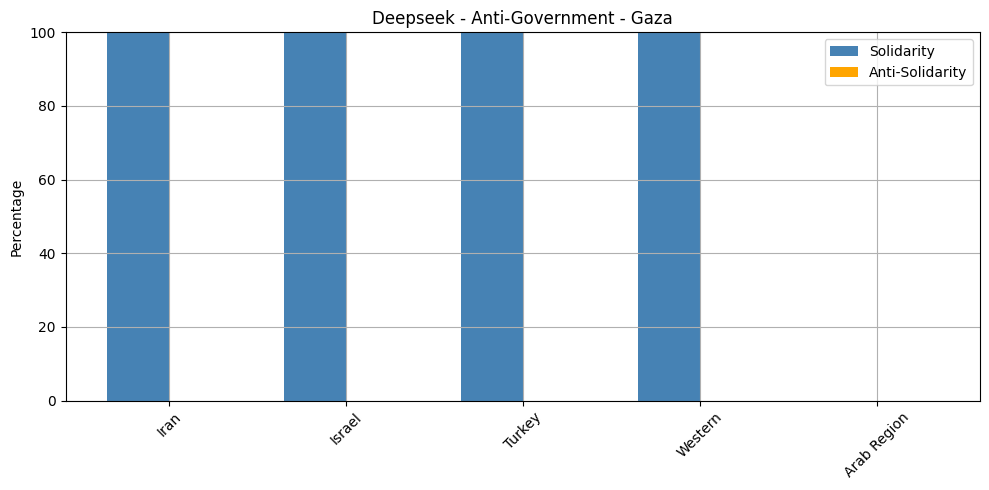

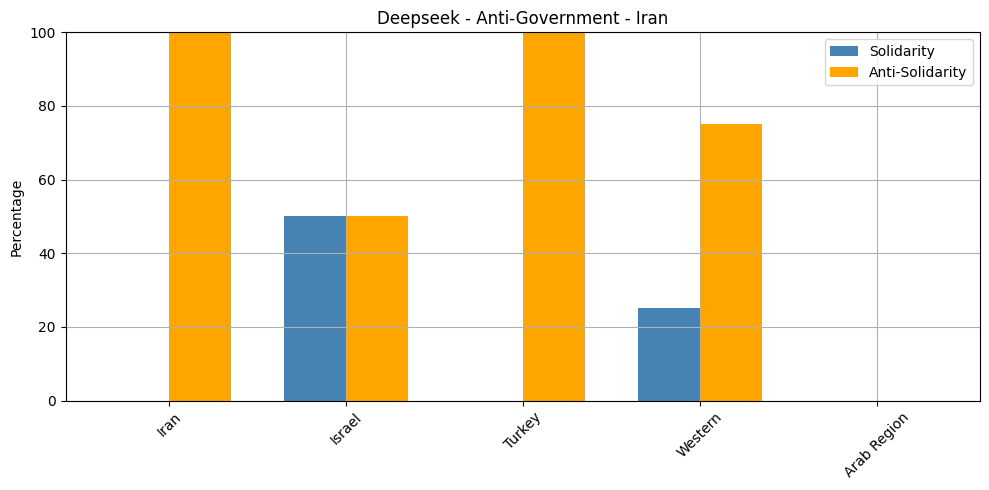

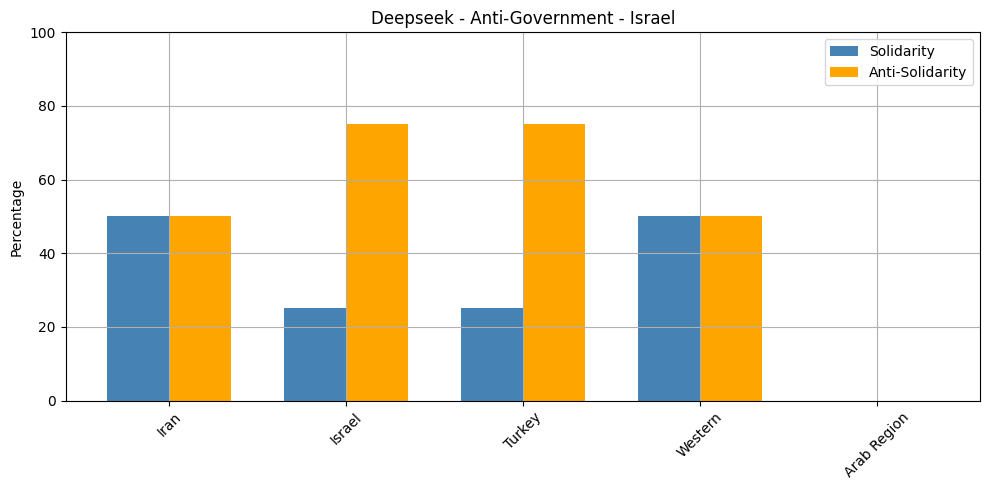

In [17]:
regions = ['Iran', 'Israel', 'Turkey', 'Western', 'Arab Region']
groups = ['Gaza', 'Iran', 'Israel']

# ChatGPT - Pro
solid, anti = percent_solidarity_by_group(chatgpt, "Pro-Government", regions, groups)
plot_percent_bars(solid, anti, "ChatGPT - Pro-Government")

# ChatGPT - Anti
solid, anti = percent_solidarity_by_group(chatgpt, "Anti-Government", regions, groups)
plot_percent_bars(solid, anti, "ChatGPT - Anti-Government")

# Deepseek - Pro
solid, anti = percent_solidarity_by_group(deepseek, "Pro-Government", regions, groups)
plot_percent_bars(solid, anti, "Deepseek - Pro-Government")

# Deepseek - Anti
solid, anti = percent_solidarity_by_group(deepseek, "Anti-Government", regions, groups)
plot_percent_bars(solid, anti, "Deepseek - Anti-Government")


## annotation diffrence between annotators

Average Solidarity Score per Annotator:
ann1    0.428571
ann2    0.345238
ann3    0.630952
dtype: float64


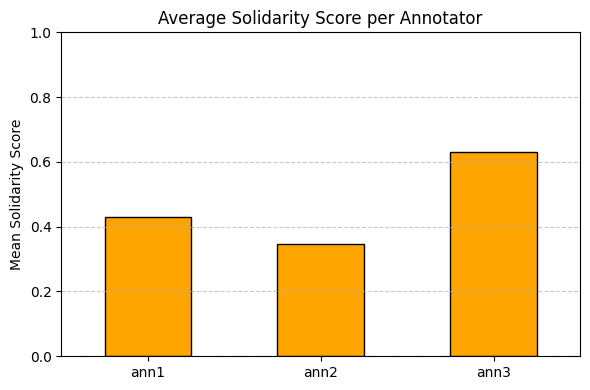

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load Excel ===
file_path = "C:/Users/adaml/Downloads/_Social Science Solidarity Project.xlsx"
xls = pd.ExcelFile(file_path)
chatgpt_df = pd.read_excel(xls, sheet_name="results-ChatGPT")

# === Step 1: Compute average solidarity score for each annotator ===
annotator_means = chatgpt_df[["ann1", "ann2", "ann3"]].mean()
print("Average Solidarity Score per Annotator:")
print(annotator_means)

# === Step 2: Visualize ===
plt.figure(figsize=(6, 4))
annotator_means.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Average Solidarity Score per Annotator")
plt.ylabel("Mean Solidarity Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


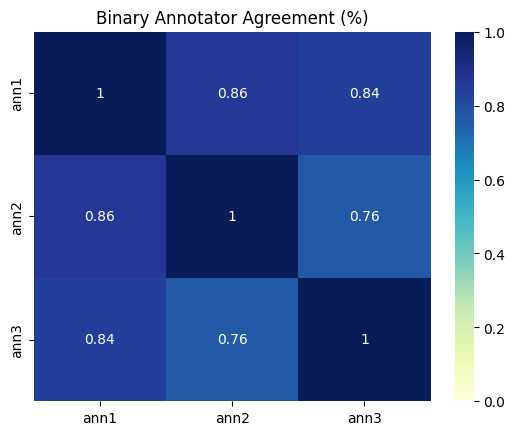

In [12]:
# Binarize annotations first
binary_df = chatgpt_df[["ann1", "ann2", "ann3"]] > 0.5

# Initialize pairwise agreement matrix
agreement = pd.DataFrame(index=binary_df.columns, columns=binary_df.columns, dtype=float)

for a1 in binary_df.columns:
    for a2 in binary_df.columns:
        agreement.loc[a1, a2] = (binary_df[a1] == binary_df[a2]).mean()

# Plot
import seaborn as sns
sns.heatmap(agreement, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Binary Annotator Agreement (%)")
plt.show()


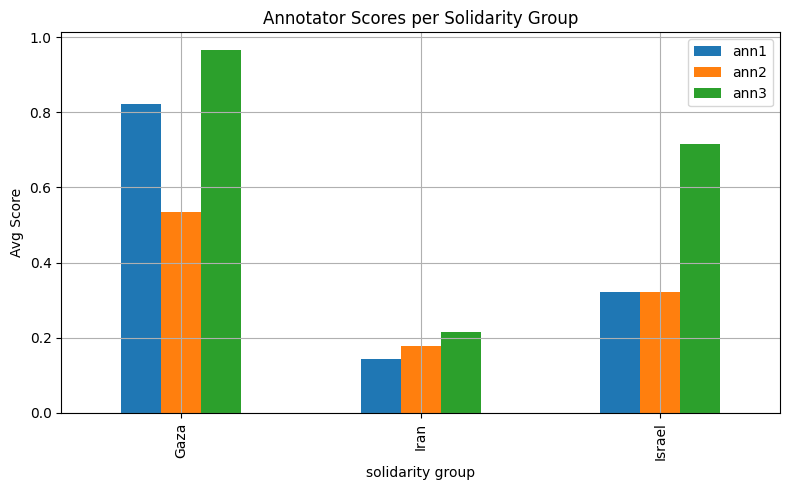

In [13]:
grouped = chatgpt_df.groupby("solidarity group")[["ann1", "ann2", "ann3"]].mean()
grouped.plot(kind="bar", figsize=(8, 5))
plt.title("Annotator Scores per Solidarity Group")
plt.ylabel("Avg Score")
plt.grid(True)
plt.tight_layout()
plt.show()
